In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression


In [2]:
data=pd.read_csv("California house price .zip")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [6]:
data.shape

(20640, 10)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
data.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [10]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
data['total_bedrooms'].fillna(int(data['total_bedrooms'].mean()), inplace=True)

In [12]:
enc=LabelEncoder()

In [13]:
data.ocean_proximity=enc.fit_transform(data.ocean_proximity)

In [14]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

x=data.drop(['median_house_value','longitude','latitude'],axis=1)
y=data['median_house_value']

In [16]:
x

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,3
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3
2,52.0,1467.0,190.0,496.0,177.0,7.2574,3
3,52.0,1274.0,235.0,558.0,219.0,5.6431,3
4,52.0,1627.0,280.0,565.0,259.0,3.8462,3
...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,1
20636,18.0,697.0,150.0,356.0,114.0,2.5568,1
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,1
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,1


In [17]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21)

In [19]:
train_data=x_train.join(y_train)

In [20]:
train_data

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
12055,39.0,679.0,164.0,769.0,179.0,2.3036,1,110600.0
10018,9.0,2802.0,447.0,955.0,418.0,5.2359,1,213300.0
3794,40.0,1973.0,382.0,774.0,352.0,4.4122,0,282300.0
162,52.0,2513.0,502.0,1048.0,518.0,3.6750,3,269900.0
13436,24.0,3477.0,831.0,2541.0,753.0,2.3682,1,97400.0
...,...,...,...,...,...,...,...,...
16432,22.0,393.0,58.0,134.0,57.0,3.9500,1,178100.0
8964,43.0,612.0,135.0,402.0,142.0,5.1322,0,314900.0
5944,33.0,3713.0,718.0,2106.0,720.0,4.0023,0,185500.0
5327,22.0,3319.0,1045.0,1848.0,940.0,3.6673,0,283300.0


array([[<AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>],
       [<AxesSubplot:title={'center':'ocean_proximity'}>,
        <AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:>]], dtype=object)

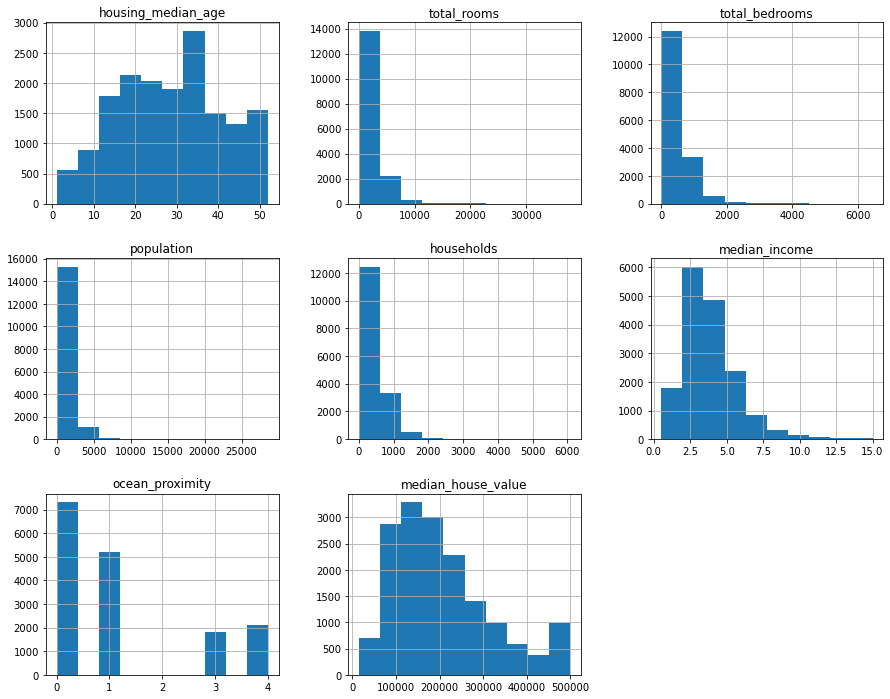

In [21]:
train_data.hist(figsize=(15,12))

In [22]:
train_data.corr()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
housing_median_age,1.000000,-0.360773,-0.319460,-0.300691,-0.303639,-0.117081,0.108346,0.106616
total_rooms,-0.360773,1.000000,0.926910,0.862283,0.917762,0.196885,-0.011152,0.136088
total_bedrooms,-0.319460,0.926910,1.000000,0.878857,0.973253,-0.009383,-0.010849,0.049266
population,-0.300691,0.862283,0.878857,1.000000,0.912751,0.004934,-0.068767,-0.023716
households,-0.303639,0.917762,0.973253,0.912751,1.000000,0.011450,-0.014231,0.066740
median_income,-0.117081,0.196885,-0.009383,0.004934,0.011450,1.000000,-0.010484,0.689804
ocean_proximity,0.108346,-0.011152,-0.010849,-0.068767,-0.014231,-0.010484,1.000000,0.085800
median_house_value,0.106616,0.136088,0.049266,-0.023716,0.066740,0.689804,0.085800,1.000000


<AxesSubplot:>

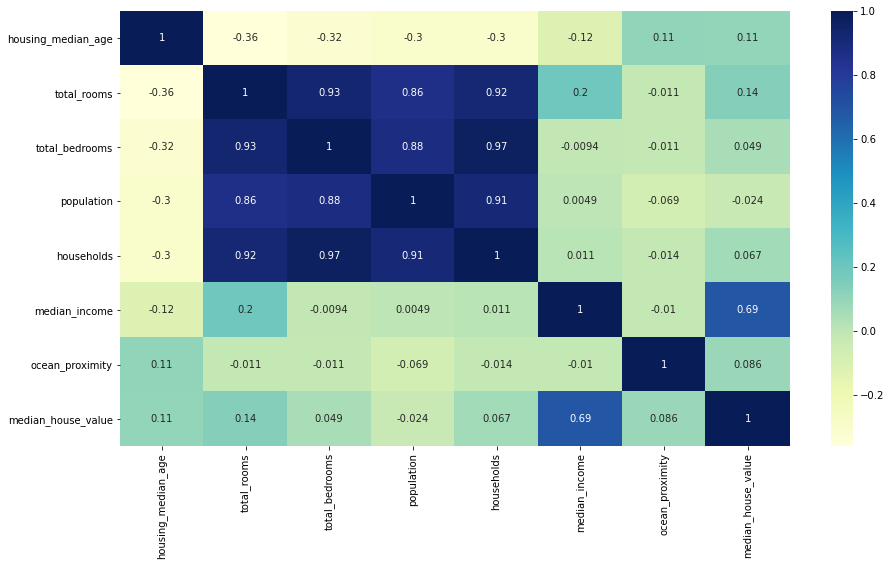

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [24]:
train_data['total_rooms']=np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms'] + 1)
train_data['population']=np.log(train_data['population'] + 1)
train_data['households']=np.log(train_data['households'] + 1)


array([[<AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>],
       [<AxesSubplot:title={'center':'ocean_proximity'}>,
        <AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:>]], dtype=object)

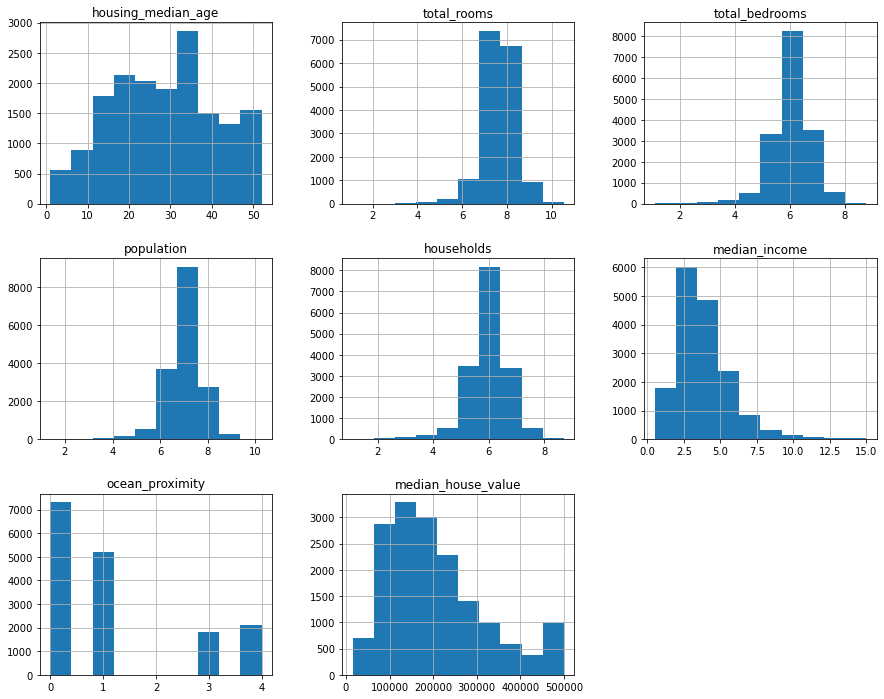

In [25]:
train_data.hist(figsize=(15,12))

In [26]:
#train_data.ocean_proximity.value_counts()    #to check the  chategories

In [27]:
#plt.figure(figsize=(15,12))
#sns.scatterplot(x="latitude",y="longitude", data=train_data ,hue="median_house_value", palette="coolwarm")

In [28]:
data['median_house_value'].value_counts()

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
243700.0      1
454800.0      1
290200.0      1
486800.0      1
289700.0      1
Name: median_house_value, Length: 3842, dtype: int64

# MODEL SELECTION

In [29]:
model=RandomForestRegressor()

In [30]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [31]:
ypred=model.predict(x_test)

In [32]:
r2_score(y_test,ypred)

0.7146250202493711

In [33]:
model=DecisionTreeRegressor()

In [34]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [35]:
ypred=model.predict(x_test)

In [36]:
r2_score(y_test,ypred)

0.4512562903264874

In [37]:
model=LinearRegression()

In [38]:
model.fit(x_train,y_train)

LinearRegression()

In [39]:
ypred=model.predict(x_test)

In [40]:
r2_score(y_test,ypred)

0.5510243845325257

In [41]:
model=LinearRegression()

In [42]:
model.fit(x_train,y_train)

LinearRegression()

In [43]:
ypred=model.predict(x_test)

In [44]:
r2_score(y_test,ypred)

0.5510243845325257

In [45]:
model=KNeighborsRegressor()

In [46]:
model.fit(x_train,y_train)

KNeighborsRegressor()

In [47]:
ypred=model.predict(x_test)

In [48]:
r2_score(y_test,ypred)

0.2729857335228627

# Here RandomForest (regressor) is giving us the highest accuracy i.e., 0.7127606633216514 % or 71% approx